# <font color="#B40404">Prise en main rapide de Pandas avec Python 3.4</font>

## <font color="#084B8A">Chapitre I</font>

<b>Créez les données</b> : Nous commençons en créant notre propre jeu de données pour l'analyse. Ceci empêche l'utilisateur final lisant ces travaux dirigés de devoir télécharger n'importe quels fichiers pour reproduire les résultats ci-dessous. Nous exporterons cet jeu de données dans un fichier texte.
<br/>
<b>Obtenez les données</b> : Nous apprendrons à lire dans le fichier texte. Les données comprennent des noms de bébé et le nombre de noms de bébé nés l'année 1880.
<br/>
<b>Préparez les données</b> : Ici nous jetterons simplement un coup d'oeil aux données et nous nous assurerons que c'est propre. Par propre je veux dire que nous jetterons un coup d'oeil à l'intérieur du contenu du fichier texte et chercherons n'importe quel anomalities. Ceux-ci peuvent inclure des données manquantes, des incohérences dans les données, ou les autres données qui semblent hors de propos. Si l'une des anomalies citées ci-dessus est détectée, il faudra prendre des décidions et savoir que faire.
<br/>
<b>Analysez les données</b> : Nous trouverons simplement le nom le plus populaire dans une année spécifique.
<br/>
<b>Présentez les données</b> : Grâce à des données tabulaires et un graphique, nous montrerons quel est le nom le plus populaire dans une année spécifique.

La librairie <b><i>panda</i></b> est utilisée pour toutes les analyses de données à l'exception d'une petite partie de la section de présentation de données. La bibliothèque de matplotlib ne sera nécessaire que pour la section de présentation de données. L'importation des bibliothèques est la première étape de cette partie.

In [1]:
# Importation de toutes les librairies nécessaires pour ce chapitre

# Syntaxe générale pour importer des fonctions spécifiques d'une librairie:
##from (librairie) import (fonctions spécifiques de la librairie)
from pandas import DataFrame, read_csv

# Syntaxe générale pour importer toute une librairie: 
##import (librairie) as (donner un alias à la librairie)
import matplotlib.pyplot as plt
import pandas as pd #Voici comment l'importation de pandas se fait généralement
import sys #On l'utilisera uniquement pour déterminer la version utilisée de Python
import matplotlib #On en a besoin pour déterminer la version utilisée de Matplotlib

# Activer le traçage en ligne  des graphique
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.4.4 |Anaconda 2.3.0 (x86_64)| (default, Jan  9 2016, 17:30:09) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.2
Matplotlib version 1.4.3


### <font color="#585858">Créez les données</font>

Le jeu des données sera composé de 5 noms de bébé et le nombre de naissances enregistrées pour cette année (1880).

In [3]:
# Le jeu de données initial des noms de bébé et le nombre de naissances
noms = ['Tidiane','Maimouna','Fatou','Adama','Daouda']
naissances = [968, 155, 77, 578, 973]

Pour fusionner ces deux listes, nous allons utiliser la fonction zip.

In [4]:
zip?

In [5]:
BabyDataSet = list(zip(noms,naissances))
BabyDataSet

[('Tidiane', 968),
 ('Maimouna', 155),
 ('Fatou', 77),
 ('Adama', 578),
 ('Daouda', 973)]

Nous avons créé le jeu de données. Nous utiliserons maintenant la bibliothèque de pandas pour exporter ce jeu de données dans un fichier csv.

df sera un objet DataFrame. Vous pouvez voir que cet objet contient l'ensemble des données des bébés dans un format semblable à une table sql ou une feuille de calcul Excel. Jetons un coup d'oeil, ci-dessous, au contenu de df.

In [6]:
df = pd.DataFrame(data = BabyDataSet, columns=['Noms', 'Naissances'])
df

,Noms,Naissances
0,Tidiane,968
1,Maimouna,155
2,Fatou,77
3,Adama,578
4,Daouda,973


Exporter le dataframe dans un fichier csv. Nous pouvons nommer le fichier Naissances1880.csv . La fonction to_csv sera utilisée pour exporter le fichier. Le fichier sera enregistré au même endroit que le notebook, sauf indication contraire.

In [7]:
df.to_csv?

Les seuls paramètres que nous allons utiliser est l'index et l'en-tête. La définition de ces paramètres à True inclura l'index et l'en-tête dans le fichier exporté. Modifiez les valeurs de ces paramètres pour obtenir une meilleure compréhension de leur utilisation.

In [8]:
df.to_csv('Naissances1880.csv',index=False,header=False)

### <font color="#585858">Obtenez les données</font>

Pour importer le fichier csv, nous allons utiliser la fonction de pandas read_csv. Jetons un coup d'oeil à cette fonction et ce qu'il faut entrer comme inputs.

In [9]:
read_csv?

Même si cette fonction a de nombreux paramètres, nous allons tout simplement passer l'emplacement du fichier texte.

Emplacement = ~/Desktop/FOLDERS/SOFWARES & SCRIPTS/PYTHON/Tutoriels/Pandas/Naissances1880.csv

Remarque: Selon l'endroit où vous enregistrez vos notebooks, vous devrez peut-être modifier l'emplacement ci-dessus.

In [10]:
Location = r'/Users/moi/Desktop/FOLDERS/SOFWARES & SCRIPTS/PYTHON/Tutoriels/Pandas/Naissances1880.csv'
df = pd.read_csv(Location)

Notez le r avant la chaîne de caract§re. Étant donné que les barres obliques sont des caractères spéciaux, en préfixant la chaîne avec un r, on va échapper à l'ensemble de la chaîne.

In [11]:
df

,Tidiane,968
0,Maimouna,155
1,Fatou,77
2,Adama,578
3,Daouda,973


Cela nous amène à notre premier problème de l'exercice. La fonction read_csv a traité le premier enregistrement dans le fichier csv comme l'en-tête. C'est évidemment faux puisque le fichier texte que nous avons exporté était sans en-tête.

Pour corriger cela, nous allons passer le paramètre header à la fonction read_csv et le régler sur None (signifie NULL en python).

In [12]:
df = pd.read_csv(Location, header=None)
df

,0,1
0,Tidiane,968
1,Maimouna,155
2,Fatou,77
3,Adama,578
4,Daouda,973


Si nous voulions donner des noms spécifiques aux colonnes, il aurait fallu passer un autre paramètre appelé names. Nous pouvons également omettre le paramètre header.

In [13]:
df = pd.read_csv(Location, names=['Noms','Naissances'])
df

,Noms,Naissances
0,Tidiane,968
1,Maimouna,155
2,Fatou,77
3,Adama,578
4,Daouda,973


Vous pouvez voir les nombres [0,1,2,3,4] comme les numéros de ligne dans un fichier Excel. Dans pandas, ils font partie de l'indice du dataframe. Vous pouvez aussi voir l'index comme la clé primaire d'une table sql à l'exception qu'un index est autorisé à avoir des doublons.

[Noms,Naissances] peut être une les en-têtes des colonnes semblables à ceux trouvés dans une base de données sql ou une feuille de calcul Excel.

<i>Supprimez le fichier csv maintenant que nous avons fini de l'utiliser.</i>

In [14]:
import os
os.remove(Location)

### <font color="#585858">Préparez des données</font>

Les données que nous avons contiennent des noms de bébé et le nombre de naissances dans l'année 1880. Nous savons déjà que nous avons 5 enregistrements et aucun des enregistrements n'est manquant (valeurs non nulles).

La colonne des noms à ce stade n'est pas concernée, car il est plus probable qu'elle soit composée de chaînes alpha-numériques (noms de bébé). Il est possible qu'il y ait de mauvaises données dans cette colonne, mais cela ne nous inquiete pas à ce stade de l'analyse. La colonne des naissances devrait simplement contenir des nombres entiers représentant le nombre de bébés nés dans une année spécifique avec un nom spécifique. Nous pouvons vérifier si le jeu de données est de type integer (entier). Il ne serait pas logique d'avoir cette colonne des données de type float (nombres décimaux). Ne vous souciez pas des valeurs aberrantes possibles à ce stade de l'analyse.

Sachez que, hormis la vérification que nous avons fait sur la colonne "Noms", regarder brièvement les données à l'intérieur du dataframe devrait être là où nous devons aller à ce stade du jeu. Comme nous continuons l'analyse des données, nous aurons beaucoup d'occasions de trouver des problèmes avec le jeu de données.

In [15]:
# Donne le type de données des colonnes
df.dtypes

Noms          object
Naissances     int64
dtype: object

In [16]:
# Donne le type de données de la colonne Naissances
df.Naissances.dtype

dtype('int64')

Comme vous pouvez le voir la colonne Naissances est de type int64 , donc il n'y a pas de floats (nombres décimaux) ou des caractères alpha-numériques dans cette colonne.

### <font color="#585858">Analysez les données</font>

Pour trouver le nom le plus populaire ou le nom du bébé avec le taux de natalité élevé, nous pouvons faire l'une des choses suivantes.

- Trier la dataframe et sélectionner la première ligne
- Utilisez l'attribut max() pour trouver la valeur maximale

In [17]:
# Methode 1:
Sorted = df.sort(['Naissances'], ascending=False)
Sorted.head(1)

,Noms,Naissances
4,Daouda,973


In [18]:
# Methode 2:
df['Naissances'].max()

973

### <font color="#585858">Présentez les données</font>

Ici, nous pouvons tracer la colonne Naissances et étiqueter le graphique pour montrer le point sur le graphique le plus élevé. En liaison avec la table, on a une image claire que Daouda est le nom du bébé le plus populaire dans le jeu de données.

plot() est un attribut convenable car pandas vous permet de tracer sans douleur les données de votre dataframe. Nous avons appris comment trouver la valeur maximale de la colonne Naissances dans la section précédente. Maintenant, trouver le nom de bébé réel de la valeur 973 semble un peu délicat.

<b>Explications:</b>
<br/>
df['Noms'] : Ceci est la liste complète des noms de bébé, la colonne des noms entière
df['Naissances'] : Ceci est la liste complète des naissances dans l'année 1880, la colonne des naissances entière
df['Naissances'].max() : Ceci est la valeur maximale trouvée dans la colonne Naissances

[df['Naissances'] == df['Naissances'].max()] veut dire à [Trouver tous les enregistrements dans la colonne Naissances où il est égal à 973]
df['Noms'][df['Naissances'] == df['Naissances'].max()] veut dire sélectionner tous les enregistrements dans la colonne des noms tels que [La colonne Naissances est égale à 973]

Une autre façon de faire aurait été d'utiliser le dataframe trié (Sorted):
Sorted['Noms'].head(1).value

La fonction str() convertit simplement un objet en une chaîne.

Le nom le plus populaire


,Noms,Naissances
4,Daouda,973


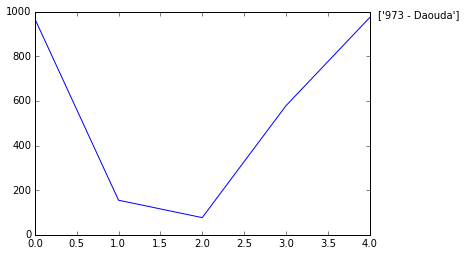

In [19]:
# Creation du graphique
df['Naissances'].plot()

# Valeur maximum pour l'ensemble des données
MaxValue = df['Naissances'].max()

# Nom associé à la valeur maximale
MaxName = df['Noms'][df['Naissances'] == df['Naissances'].max()].values

# Texte à afficher sur le graphique
Text = str(MaxValue) + " - " + MaxName

# Ajout du texte au graphique
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("Le nom le plus populaire")
df[df['Naissances'] == df['Naissances'].max()]
#Sorted.head(1) peut aussi faire l'affaire

## <font color="#084B8A">Chapitre II</font>

<b>Obtenir les données</b> : Notre jeu de données sera constituée d'un fichier Excel contenant le nombre de clients par jour. Nous allons apprendre à lire dans le fichier Excel pour traitement.
<br/>
<b>Préparer les données</b> : Les données sont une série chronologique irrégulière ayant des dates en double. Nous serons mis au défi dans la compression des données et le nombre de clients prévus pour les prochaines années.
<br/>
<b>Analyser les données</b> : Nous utilisons des graphiques pour visualiser les tendances et repérer des valeurs aberrantes. Certains outils de calcul intégrés seront utilisés pour calculer pour les prochaines années le nombre de clients prévu.
<b>Présentation des données</b> : Les résultats seront déssinés.

<b>REMARQUE : Pour les débutants, assurez-vous d'avoir regardé le chapitre précédent, car les connaissances acquises dans le chapitre précédent seront nécessaires pour cet exercice.</b>

In [20]:
# Importation des librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

<i>Nous allons créer nos propres données de test pour l'analyse.</i>

In [21]:
# set seed
np.seed(111)

# Fonction pour générer les données test
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Création d'une plage de date hebdomadaire (lundi)
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='W-MON')
        
        # Creation de données aléatoires
        data = np.randint(low=25,high=1000,size=len(rng))
        
        # Association de statut
        status = [1,2,3]
        
        # Faire une liste aléatoire de statut
        random_status = [status[np.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # Association de statut
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Faire une liste aléatoire de statut
        random_states = [states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_status, data, rng))
        
    return Output

Maintenant que nous avons une fonction pour générer nos données de test, créons des données et collons les dans un dataframe.

In [22]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 32.7+ KB


In [23]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


Nous allons maintenant enregistrer ce dataframe dans un fichier Excel. Nous faisons cela pour vous montrer comment lire et écrire des fichiers Excel.

Nous n'écrivons les valeurs de l'indice de la dataframe au fichier Excel , car ils ne sont pas destinés à faire partie de notre jeu de données de test initial .

In [24]:
# Sauvegarde les résultats dans excel
df.to_excel('Lesson3.xlsx', index=False)
print('Done')

Done


### <font color="#585858">Récupérer les données de Excel</font>

Nous allons utiliser la fonction read_excel pour lire des données à partir d'un fichier Excel. La fonction vous permet de lire dans les onglets specfiques par nom ou par emplacement.

In [25]:
pd.read_excel?

<b>Remarque: L'emplacement du fichier Excel est le même que celui du notebook, sauf indication contraire.</b>

In [26]:
# Emplacement du fichier
Location = r'/Users/moi/Desktop/FOLDERS/SOFWARES & SCRIPTS/PYTHON/Tutoriels/Pandas/Lesson3.xlsx'

# Choisir une feuille specifique
df = pd.read_excel(Location, 0, index_col='StatusDate')
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [27]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09', 
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=836, freq=None, tz=None)

In [28]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300


### <font color="#585858">Préparer les données</font>

Cette section tente de nettoyer les données pour l'analyse .

1. Assurez-vous que la colonne State est tout en majuscules
2. Seuls les enregistrements où State  est égal à "1" sont sélectionnés
3. Fusionner (NJ et New York) à New York dans la colonne State
4. Retirez toutes les valeurs aberrantes (tous les résultats impairs dans le jeu de données)

Jetons un rapide coup d'oeil sur la façon dont certaines des valeurs de State sont les majuscules et certains sont minuscules

In [29]:
df['State'].unique()

array(['GA', 'FL', 'fl', 'TX', 'NY', 'NJ'], dtype=object)

Pour convertir toutes les valeurs de State en majuscules, nous allons utiliser la fonction upper() et l'appliquer au dataframe. La fonction lambda permet simplement d'appliquer la fonction upper à chaque valeur dans la colonne State.

In [30]:
# Nettoie la colonne State, convertit en majuscule
df['State'] = df.State.apply(lambda x: x.upper())

In [31]:
df['State'].unique()

array(['GA', 'FL', 'TX', 'NY', 'NJ'], dtype=object)

In [32]:
# Prend seulement les status == 1
mask = df['Status'] == 1
df = df[mask]

Pour changer les States NJ en New York nous allons simplement ...

<b>[df.State == 'NJ']</b> : Trouver tous les enregistrements dans la colonne State où ils sont égaux à NJ.
<br/>
<b>df.State[df.State == 'NJ'] = 'NY'</b> : Pour tous les enregistrements dans la colonne State où ils sont égaux à NJ, les remplacer par NY.

In [33]:
# Change NJ en NY
mask = df.State == 'NJ'
df['State'][mask] = 'NY'

Maintenant, nous pouvons voir que nous avons un jeu de données beaucoup plus propre avec lequel on peut travailler.

In [34]:
df['State'].unique()

array(['GA', 'FL', 'NY', 'TX'], dtype=object)

À ce stade, on peut vouloir représenter graphiquement les données pour vérifier toutes les valeurs aberrantes ou les incohérences dans les données. Nous allons utiliser l'attribut plot() du dataframe.

Comme vous pouvez le voir sur le graphique ci-dessous, ce n'est pas très concluant et c'est probablement un signe que nous devons effectuer une préparation supplémentaire des données.

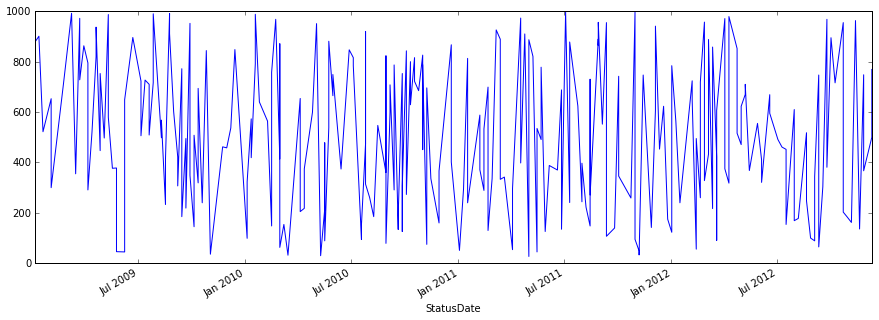

In [35]:
df['CustomerCount'].plot(figsize=(15,5));

Si nous examinons les données, nous commençons à réaliser qu'il y a plusieurs valeurs pour le même State, StatusDate, et des combinaisons de Status. Il est possible que cela signifie que les données avec lesquels on travaille sont sales/mauvaises/inexactes, mais nous feront une autre supposition. Nous pouvons supposer que ce jeu de données est un sous-ensemble d'un jeu de données plus grand et si l'on ajoute simplement les valeurs dans la colonne CustomerCount par State, StatusDate, et Status, nous allons obtenir le nombre total de clients par jour.

In [36]:
sortdf = df[df['State']=='NY'].sort_index(axis=0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-01-19,NY,1,522
2009-02-23,NY,1,710
2009-03-09,NY,1,992
2009-03-16,NY,1,355
2009-03-23,NY,1,728
2009-03-30,NY,1,863
2009-04-13,NY,1,520
2009-04-20,NY,1,820
2009-04-20,NY,1,937


Notre travail consiste maintenant à créer un nouveau dataframe qui compresse les données que nous avons par jour le nombre de clients par State et StatusDate. Nous pouvons ignorer la colonne State puisque toutes les valeurs de cette colonne sont de 1. Pour ce faire, nous allons utiliser les fonctions du dataframe groupby et sum().

Notez que nous avons dû utiliser reset_index. Si nous ne l'avions pas fait, nous n'aurions pas été en mesure de grouper à la fois par State et StatusDate puisque la fonction groupby attend seulement des colonnes comme inputs. La fonction reset_index transformera l'index StatusDate en une colonne dans le dataframe.

In [37]:
# Groupe par State et StatusDate
Daily = df.reset_index().groupby(['State','StatusDate']).sum()
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-12       1            901
      2009-02-02       1            653
      2009-03-23       1            752
      2009-04-06       2           1086
      2009-06-08       1            649

Les colonnes Sate et StatusDate sont automatiquement placés dans l'index du dataframe Daily. Vous pouvez penser à l'index comme la clé primaire d'une table de base de données, mais sans la contrainte d'avoir des valeurs uniques. Les colonnes dans l'index comme vous le verrez vont nous permettre de sélectionner facilement, déssiner, et effectuer des calculs sur les données.

Ci-dessous, nous supprimons la colonne State, car il est partout égal à un et n'est plus nécessaire.

In [38]:
del Daily['Status']
Daily.head()

CustomerCount
State StatusDate               
FL    2009-01-12            901
      2009-02-02            653
      2009-03-23            752
      2009-04-06           1086
      2009-06-08            649

In [39]:
# Quels sont les index du dataframe
Daily.index

MultiIndex(levels=[['FL', 'GA', 'NY', 'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-02-02 00:00:00, 2009-02-23 00:00:00, 2009-03-09 00:00:00, 2009-03-16 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-04-27 00:00:00, 2009-05-04 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-05-25 00:00:00, 2009-06-08 00:00:00, 2009-06-22 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-20 00:00:00, 2009-07-27 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-08-31 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-09-28 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-23 00:00:00, 2009-11-30 00:00:00, 2009-12-07 00:00:00, 2009-12-14 00:00:00, 2010-01-04 00:00:00, 2010-01-11 00:00:00, 2010-01-18 00:00:00, 2010-01-25 00:00:00, 2010-02-08 00:00:00, 2010-02-1

In [40]:
# Selection des State par indice
Daily.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='State')

In [41]:
# Selection des StatusDate par indice
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-02-02',
               '2009-02-23', '2009-03-09', '2009-03-16', '2009-03-23',
               '2009-03-30', '2009-04-06', 
               ...
               '2012-09-24', '2012-10-01', '2012-10-08', '2012-10-22',
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-10'],
              dtype='datetime64[ns]', name='StatusDate', length=161, freq=None, tz=None)

Traçons maintenant les données par State.

Comme vous pouvez le voir en scindant le graphique par la colonne State, nous avons une image beaucoup plus claire sur ce à quoi les données réssemblent. Pouvez-vous repérer les valeurs aberrantes ?

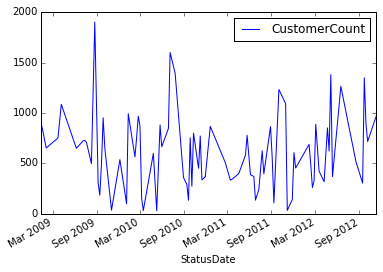

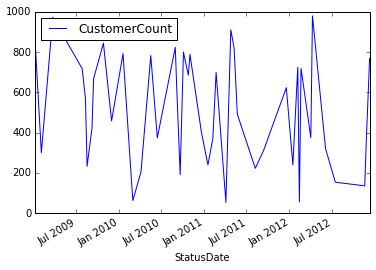

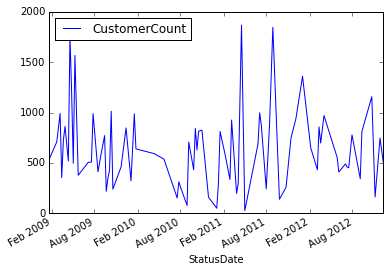

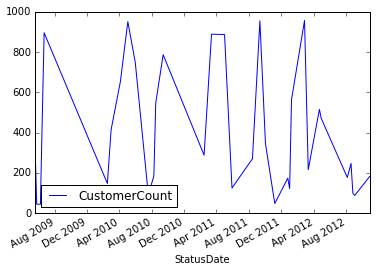

In [42]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot();

Nous pouvons aussi tracer les données à une date précise, comme 2012 par exemple. Nous pouvons maintenant voir clairement que les données de ces States (États). Puisque les données sont constituées de comptes de clients hebdomadaires, la variabilité des données semble suspect. Pour ce tutoriel, nous allons supposer que ce sont de mauvaises données.

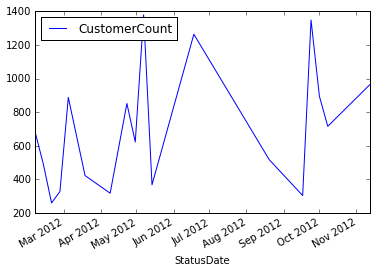

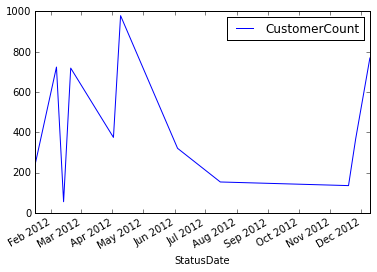

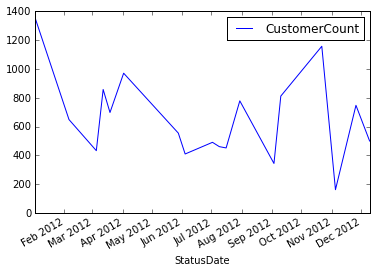

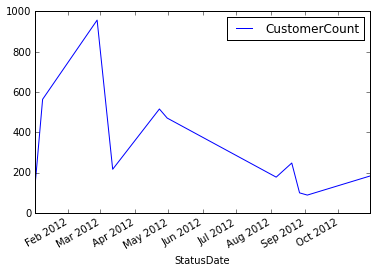

In [43]:
Daily.loc['FL']['2012':].plot()
Daily.loc['GA']['2012':].plot()
Daily.loc['NY']['2012':].plot()
Daily.loc['TX']['2012':].plot();

Nous supposerons que par mois, le nombre de clients devrait rester relativement stable. Toutes les données en dehors d'une gamme spécifique de ce mois seront retirés du jeu de données. Le résultat final devrait avoir des graphiques lisses sans pointes .

<b>StateYearMonth</b> : Ici, nous groupons par State , Année de StatusDate, et mois de StatusDate.
<b>Daily['Outlier']</b> : Une valeur booléenne (True ou False) pour nous faire savoir si la valeur dans la colonne CustomerCount est en dehors de la plage acceptable .

Nous allons utiliser l'attribut transform au lieu de apply. La raison est que la transform gardera la forme (nombre de lignes et de colonnes) de la dataframe et apply ne le fera pas. En regardant les graphiques précédents, nous pouvons réaliser qu'ils ne ressemblent pas à une distribution gaussienne, cela signifie que nous ne pouvons pas utiliser les statistiques sommaires comme la moyenne et stdev. Nous utilisons les pourcentages à la place. Notez que nous courons le risque d'éliminer de bonnes données.

In [44]:
# Calcul des valeurs aberrantes
StateYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Upper'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper']) 

# Suupression des valeurs aberrantes
Daily = Daily[Daily['Outlier'] == False]

Le dataframe appelé Daily contiendra les comptes clients qui ont été agrégées par jour. Les données d'origine (df) ont plusieurs enregistrements par jour. Nous nous retrouvons avec un jeu de données qui est indexé à la fois par State et StatusDate. La colonne Outlier doit être égale à False signifiant que l'enregistrement n'est pas une valeur aberrante.

In [45]:
Daily.head()

CustomerCount  Lower   Upper Outlier
State StatusDate                                      
FL    2009-01-12            901  450.5  1351.5   False
      2009-02-02            653  326.5   979.5   False
      2009-03-23            752  376.0  1128.0   False
      2009-04-06           1086  543.0  1629.0   False
      2009-06-08            649  324.5   973.5   False

Nous créons un dataframe séparé nommé ALL qui regroupe le dataframe Daily par StatusDate. Nous nous débarrassons essentiellement de la colonne State. La colonne Max représente le nombre maximal de clients par mois. La colonne Max est utilisé pour lisser le graphique .

In [46]:
# Combine all markets

# Obtenir le nombre de client max par mois
ALL = pd.DataFrame(Daily['CustomerCount'].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['CustomerCount'] # renomme la colonne

# Groupe par année et mois
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

# Quel est le nombre de clients max par année et mois
ALL['Max'] = YearMonth['CustomerCount'].transform(lambda x: x.max())
ALL.head()

,CustomerCount,Max
StatusDate,,
2009-01-05,877,901
2009-01-12,901,901
2009-01-19,522,901
2009-02-02,953,953
2009-02-23,710,953


Comme vous pouvez le voir sur la dataframe ALL ci-dessus, dans le mois de Janvier 2009, le nombre maximal de clients était 901. Si nous avions utilisé apply, nous aurions obtenu un dataframe avec (année et mois) comme l'indice et juste la colonne Max avec la valeur de 901 .

Il y a aussi un intérêt pour évaluer si le nombre de clients actuels atteignaient certains objectifs que la compagnie avait établis. Cela consiste ici est à montrer visuellement si le nombre de clients actuels atteint les objectifs énumérés ci-dessous. Nous appellerons objectifs BHAG (Big Hairy Annual Goal) .

- 12/31/2011 - 1000 clients
- 12/31/2012 - 2000 clients
- 12/31/2013 - 3000 clients

Nous allons utiliser la fonction date_range pour créer nos dates .

<b>Définition</b> : date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, closed=None)
<br/>
<b>Docstring</b> : Retourne un indice de type datetime de fréquence fixe, avec <i>jour</i> (calendrier) comme la fréquence par défaut.

En choisissant de mettre la valeur de fréquence à A (annuelle), nous serons en mesure d'obtenir les trois dates cibles d'en haut.

In [47]:
pd.date_range?

In [48]:
# Creation du dataframe BHAG
data = [1000,2000,3000]
idx = pd.date_range(start='12/31/2011', end='12/31/2013', freq='A')
BHAG = pd.DataFrame(data, index=idx, columns=['BHAG'])
BHAG

,BHAG
2011-12-31,1000
2012-12-31,2000
2013-12-31,3000


La combinaison de dataframes est simplifiée en utilisant la fonction concat. Rappelez-vous quand nous choisissions axis=0 nous ajoutions une ligne.

In [49]:
# Combine le jeu de données de BHAG et de ALL
combined = pd.concat([ALL,BHAG], axis=0)
combined = combined.sort_index(axis=0)
combined.tail()

,BHAG,CustomerCount,Max
2012-11-19,NaN,136,1115
2012-11-26,NaN,1115,1115
2012-12-10,NaN,1269,1269
2012-12-31,2000,NaN,NaN
2013-12-31,3000,NaN,NaN


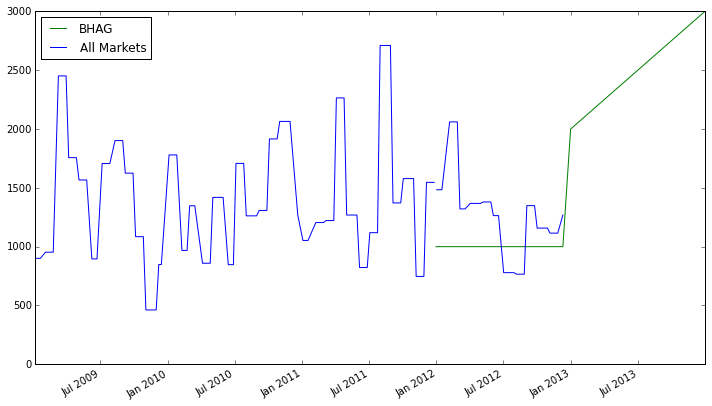

In [50]:
fig, axes = plt.subplots(figsize=(12, 7))

combined['BHAG'].fillna(method='pad').plot(color='green', label='BHAG')
combined['Max'].plot(color='blue', label='All Markets')
plt.legend(loc='best');

Il était également nécessaire de prévoir le nombre de clients de l'année prochaine et nous pouvons le faire en quelques étapes simples. Nous allons d'abord grouper le dataframe combiné par année et placer le nombre maximum de clients pour cette année. Cela nous donnera une ligne par année.

In [51]:
# Groupe par année ensuite donne la valeur maximale par année
Year = combined.groupby(lambda x: x.year).max()
Year

,BHAG,CustomerCount,Max
2009,NaN,2452,2452
2010,NaN,2065,2065
2011,1000,2711,2711
2012,2000,2061,2061
2013,3000,NaN,NaN


In [52]:
# Ajoute une colonne representant changement de pourcentage par an
Year['YR_PCT_Change'] = Year['Max'].pct_change(periods=1)
Year

,BHAG,CustomerCount,Max,YR_PCT_Change
2009,NaN,2452,2452,NaN
2010,NaN,2065,2065,-0.157830
2011,1000,2711,2711,0.312833
2012,2000,2061,2061,-0.239764
2013,3000,NaN,NaN,NaN


Pour obtenir le nombre de clients de fin de l'année prochaine, nous allons supposer que notre taux de croissance actuel reste constant. Nous allons ensuite augmenter cette année le nombre de clients de cette quantité et ce sera notre prévision pour l'année prochaine.

In [53]:
(1 + Year.ix[2012,'YR_PCT_Change']) * Year.ix[2012,'Max']

1566.8465510881595

### <font color="#585858">Présentation des données</font>

Créer des graphiques individuels par State.

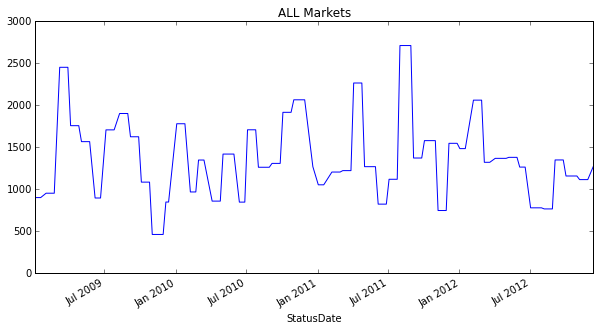

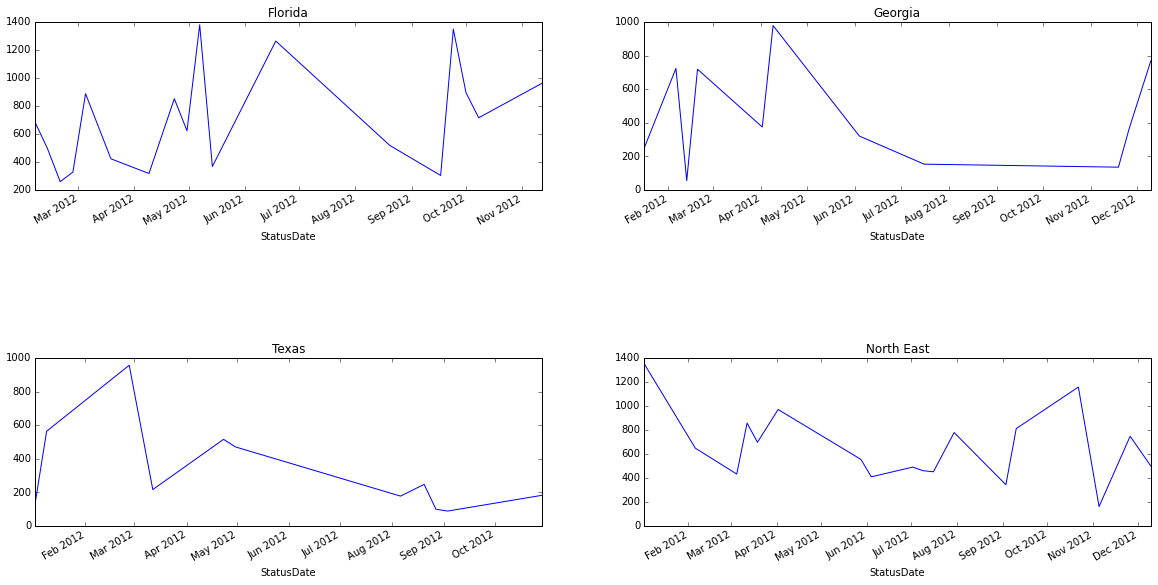

In [54]:
# Premier Graphe
ALL['Max'].plot(figsize=(10, 5));plt.title('ALL Markets')

# Quatres derniers Graphes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=1.0) ## Create space between plots

Daily.loc['FL']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,0])
Daily.loc['GA']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,1]) 
Daily.loc['TX']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,0]) 
Daily.loc['NY']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,1]) 

# Ajout des titres
axes[0,0].set_title('Florida')
axes[0,1].set_title('Georgia')
axes[1,0].set_title('Texas')
axes[1,1].set_title('North East');

<i>Supprimez le fichier xlsx étant donné que nous avons fini de l'utiliser.</i>

In [55]:
import os
os.remove(Location)

## <font color="#084B8A">Chapitre III</font>

Dans ce chapitre, on va revenir à l'essentiel. Nous allons travailler avec un petit jeu de données de sorte que vous puissiez facilement comprendre ce que je suis en train d'expliquer. Nous allons ajouter des colonnes, supprimer des colonnes, et découper les données de différentes façons. Amusons-nous !

In [56]:
# Importation des librairies
import pandas as pd
import sys

In [57]:
# Notre petit jeu de données
d = [0,1,2,3,4,5,6,7,8,9]

# Création de notre dataframe
df = pd.DataFrame(d)
df

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [58]:
# Changeons the nom de la colonne
df.columns = ['Rev']
df

,Rev
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [59]:
# Ajoutons une colonne
df['NewCol'] = 5
df

,Rev,NewCol
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5
5,5,5
6,6,5
7,7,5
8,8,5
9,9,5


In [60]:
# Modifions notre nouvelle colonne
df['NewCol'] = df['NewCol'] + 1
df

,Rev,NewCol
0,0,6
1,1,6
2,2,6
3,3,6
4,4,6
5,5,6
6,6,6
7,7,6
8,8,6
9,9,6


In [61]:
# Nous pouvons supprimer les colonnes
del df['NewCol']
df

,Rev
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [62]:
# Ajoutons un couple de colonnes
df['test'] = 3
df['col'] = df['Rev']
df

,Rev,test,col
0,0,3,0
1,1,3,1
2,2,3,2
3,3,3,3
4,4,3,4
5,5,3,5
6,6,3,6
7,7,3,7
8,8,3,8
9,9,3,9


In [63]:
# Si nous voulions , nous pourrions changer le nom de l'index
i = ['a','b','c','d','e','f','g','h','i','j']
df.index = i
df

,Rev,test,col
a,0,3,0
b,1,3,1
c,2,3,2
d,3,3,3
e,4,3,4
f,5,3,5
g,6,3,6
h,7,3,7
i,8,3,8
j,9,3,9


Nous pouvons maintenant commencer à sélectionner des morceaux de la dataframe utilisant loc.

In [64]:
df.loc['a']

Rev     0
test    3
col     0
Name: a, dtype: int64

In [65]:
# df.loc[inclus:inclus]
df.loc['a':'d']

,Rev,test,col
a,0,3,0
b,1,3,1
c,2,3,2
d,3,3,3


In [66]:
# df.iloc[inclus:exclus]
# Remarque: .iloc est la position strictement basée sur les entiers.
df.iloc[0:3]

,Rev,test,col
a,0,3,0
b,1,3,1
c,2,3,2


Nous pouvons également choisir d'utiliser le nom de la colonne.

In [67]:
df['Rev']

a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
i    8
j    9
Name: Rev, dtype: int64

In [68]:
df[['Rev', 'test']]

,Rev,test
a,0,3
b,1,3
c,2,3
d,3,3
e,4,3
f,5,3
g,6,3
h,7,3
i,8,3
j,9,3


In [69]:
# df.ix[lignes,colonnes]
df.ix[0:3,'Rev']

a    0
b    1
c    2
Name: Rev, dtype: int64

In [70]:
df.ix[5:,'col']

f    5
g    6
h    7
i    8
j    9
Name: col, dtype: int64

In [71]:
df.ix[:3,['col', 'test']]

,col,test
a,0,3
b,1,3
c,2,3


Il y a aussi une fonction pratique pour sélectionner les enregistrements supérieure et inférieure d'un dataframe.

In [72]:
# Sélectionnez les N premiers enregistrements (par défaut = 5)
df.head()

,Rev,test,col
a,0,3,0
b,1,3,1
c,2,3,2
d,3,3,3
e,4,3,4


In [73]:
# Sélectionnez les N derniers enregistrements (par défaut = 5)
df.tail()

,Rev,test,col
f,5,3,5
g,6,3,6
h,7,3,7
i,8,3,8
j,9,3,9


## <font color="#084B8A">Chapitre IV</font>

Nous allons jeter un coup d'oeil sur les fonctions stack et unstack.

In [74]:
# Importation des librairies
import pandas as pd
import sys

In [75]:
# Notre petit jeu de données
d = {'one':[1,1],'two':[2,2]}
i = ['a','b']

# Création du dataframe
df = pd.DataFrame(data = d, index = i)
df

,one,two
a,1,2
b,1,2


In [76]:
df.index

Index(['a', 'b'], dtype='object')

In [77]:
# Apporter les colonnes et les placer dans l'index
stack = df.stack()
stack

a  one    1
   two    2
b  one    1
   two    2
dtype: int64

In [78]:
# L'indice comprend maintenant les noms de colonnes
stack.index

MultiIndex(levels=[['a', 'b'], ['one', 'two']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [79]:
unstack = df.unstack()
unstack

one  a    1
     b    1
two  a    2
     b    2
dtype: int64

In [80]:
unstack.index

MultiIndex(levels=[['one', 'two'], ['a', 'b']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [81]:
transpose = df.T
transpose

,a,b
one,1,1
two,2,2


In [82]:
transpose.index

Index(['one', 'two'], dtype='object')

## <font color="#084B8A">Chapitre V</font>

Voyons maintenant la fonction groupby.

In [83]:
# Importation des librairies
import pandas as pd
import sys

In [84]:
# Notre jeu de données
d = {'one':[1,1,1,1,1],
     'two':[2,2,2,2,2],
     'letter':['a','a','b','b','c']}

# Création de notre dataframe
df = pd.DataFrame(d)
df

,letter,one,two
0,a,1,2
1,a,1,2
2,b,1,2
3,b,1,2
4,c,1,2


In [85]:
# Création d'un groupe d'object
one = df.groupby('letter')

# Application de la fonction sum
one.sum()

,one,two
letter,,
a,2,4
b,2,4
c,1,2


In [86]:
letterone = df.groupby(['letter','one']).sum()
letterone

,,two
letter,one,
a,1,4
b,1,4
c,1,2


In [87]:
letterone.index

MultiIndex(levels=[['a', 'b', 'c'], [1]],
           labels=[[0, 1, 2], [0, 0, 0]],
           names=['letter', 'one'])

Vous voudrez peut-être ne pas avoir les colonnes que vous avez groupé en index, on peut facilement le faire, comme indiqué ci-dessous.

In [88]:
letterone = df.groupby(['letter','one'], as_index=False).sum()
letterone

,letter,one,two
0,a,1,4
1,b,1,4
2,c,1,2


## <font color="#084B8A">Chapitre VI</font>

### <font color="#585858">Valeurs aberrantes</font>

In [89]:
import pandas as pd
import sys

In [90]:
# Création d'un dataframe avec des dates comme index
States = ['NY', 'NY', 'NY', 'NY', 'FL', 'FL', 'GA', 'GA', 'FL', 'FL'] 
data = [1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10]
idx = pd.date_range('1/1/2012', periods=10, freq='MS')
df1 = pd.DataFrame(data, index=idx, columns=['Revenue'])
df1['State'] = States

# Création d'un second dataframe
data2 = [10.0, 10.0, 9, 9, 8, 8, 7, 7, 6, 6]
idx2 = pd.date_range('1/1/2013', periods=10, freq='MS')
df2 = pd.DataFrame(data2, index=idx2, columns=['Revenue'])
df2['State'] = States

In [91]:
# Combine les dataframes
df = pd.concat([df1,df2])
df

,Revenue,State
2012-01-01,1,NY
2012-02-01,2,NY
2012-03-01,3,NY
2012-04-01,4,NY
2012-05-01,5,FL
2012-06-01,6,FL
2012-07-01,7,GA
2012-08-01,8,GA
2012-09-01,9,FL
2012-10-01,10,FL


### <font color="#585858">Les façons de calculer les valeurs aberrantes</font>

Remarque: La moyenne et la variance sont valables uniquement pour les distributions gaussiennes.

In [92]:
# Methode 1

# Fait une copie du df original
newdf = df.copy()

newdf['x-Mean'] = abs(newdf['Revenue'] - newdf['Revenue'].mean())
newdf['1.96*std'] = 1.96*newdf['Revenue'].std()  
newdf['Outlier'] = abs(newdf['Revenue'] - newdf['Revenue'].mean()) > 1.96*newdf['Revenue'].std()
newdf

,Revenue,State,x-Mean,1.96*std,Outlier
2012-01-01,1,NY,5.75,5.200273,True
2012-02-01,2,NY,4.75,5.200273,False
2012-03-01,3,NY,3.75,5.200273,False
2012-04-01,4,NY,2.75,5.200273,False
2012-05-01,5,FL,1.75,5.200273,False
2012-06-01,6,FL,0.75,5.200273,False
2012-07-01,7,GA,0.25,5.200273,False
2012-08-01,8,GA,1.25,5.200273,False
2012-09-01,9,FL,2.25,5.200273,False
2012-10-01,10,FL,3.25,5.200273,False


In [93]:
# Methode 2
# Groupe par item

# Fait une copie du df original
newdf = df.copy()

State = newdf.groupby('State')

newdf['Outlier'] = State.transform( lambda x: abs(x-x.mean()) > 1.96*x.std() )
newdf['x-Mean'] = State.transform( lambda x: abs(x-x.mean()) )
newdf['1.96*std'] = State.transform( lambda x: 1.96*x.std() )
newdf

,Revenue,State,Outlier,x-Mean,1.96*std
2012-01-01,1,NY,False,5.00,7.554813
2012-02-01,2,NY,False,4.00,7.554813
2012-03-01,3,NY,False,3.00,7.554813
2012-04-01,4,NY,False,2.00,7.554813
2012-05-01,5,FL,False,2.25,3.434996
2012-06-01,6,FL,False,1.25,3.434996
2012-07-01,7,GA,False,0.25,0.980000
2012-08-01,8,GA,False,0.75,0.980000
2012-09-01,9,FL,False,1.75,3.434996
2012-10-01,10,FL,False,2.75,3.434996


In [94]:
# Methode 2
# Groupe par items multiples

# Fait une copie du df original
newdf = df.copy()

StateMonth = newdf.groupby(['State', lambda x: x.month])

newdf['Outlier'] = StateMonth.transform( lambda x: abs(x-x.mean()) > 1.96*x.std() )
newdf['x-Mean'] = StateMonth.transform( lambda x: abs(x-x.mean()) )
newdf['1.96*std'] = StateMonth.transform( lambda x: 1.96*x.std() )
newdf

,Revenue,State,Outlier,x-Mean,1.96*std
2012-01-01,1,NY,False,4.5,12.473364
2012-02-01,2,NY,False,4.0,11.087434
2012-03-01,3,NY,False,3.0,8.315576
2012-04-01,4,NY,False,2.5,6.929646
2012-05-01,5,FL,False,1.5,4.157788
2012-06-01,6,FL,False,1.0,2.771859
2012-07-01,7,GA,False,0.0,0.000000
2012-08-01,8,GA,False,0.5,1.385929
2012-09-01,9,FL,False,1.5,4.157788
2012-10-01,10,FL,False,2.0,5.543717


In [95]:
# Methode 3
# Groupe par item

# Fait une copie du df original
newdf = df.copy()

State = newdf.groupby('State')

def s(group):
    group['x-Mean'] = abs(group['Revenue'] - group['Revenue'].mean())
    group['1.96*std'] = 1.96*group['Revenue'].std()  
    group['Outlier'] = abs(group['Revenue'] - group['Revenue'].mean()) > 1.96*group['Revenue'].std()
    return group

Newdf2 = State.apply(s)
Newdf2

,Revenue,State,x-Mean,1.96*std,Outlier
2012-01-01,1,NY,5.00,7.554813,False
2012-02-01,2,NY,4.00,7.554813,False
2012-03-01,3,NY,3.00,7.554813,False
2012-04-01,4,NY,2.00,7.554813,False
2012-05-01,5,FL,2.25,3.434996,False
2012-06-01,6,FL,1.25,3.434996,False
2012-07-01,7,GA,0.25,0.980000,False
2012-08-01,8,GA,0.75,0.980000,False
2012-09-01,9,FL,1.75,3.434996,False
2012-10-01,10,FL,2.75,3.434996,False


In [96]:
# Methode 3
# Groupe par items multiples

# Fait une copie du df original
newdf = df.copy()

StateMonth = newdf.groupby(['State', lambda x: x.month])

def s(group):
    group['x-Mean'] = abs(group['Revenue'] - group['Revenue'].mean())
    group['1.96*std'] = 1.96*group['Revenue'].std()  
    group['Outlier'] = abs(group['Revenue'] - group['Revenue'].mean()) > 1.96*group['Revenue'].std()
    return group

Newdf2 = StateMonth.apply(s)
Newdf2

,Revenue,State,x-Mean,1.96*std,Outlier
2012-01-01,1,NY,4.5,12.473364,False
2012-02-01,2,NY,4.0,11.087434,False
2012-03-01,3,NY,3.0,8.315576,False
2012-04-01,4,NY,2.5,6.929646,False
2012-05-01,5,FL,1.5,4.157788,False
2012-06-01,6,FL,1.0,2.771859,False
2012-07-01,7,GA,0.0,0.000000,False
2012-08-01,8,GA,0.5,1.385929,False
2012-09-01,9,FL,1.5,4.157788,False
2012-10-01,10,FL,2.0,5.543717,False


En supposant que ce ne soit pas une distribution gaussienne (si nous faisons un graphique, il ne ressemblera pas à une distribution normale)

In [97]:
# Fait une copie du df original
newdf = df.copy()

State = newdf.groupby('State')

newdf['Lower'] = State['Revenue'].transform( lambda x: x.quantile(q=.25) - (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf['Upper'] = State['Revenue'].transform( lambda x: x.quantile(q=.75) + (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf['Outlier'] = (newdf['Revenue'] < newdf['Lower']) | (newdf['Revenue'] > newdf['Upper']) 
newdf

,Revenue,State,Lower,Upper,Outlier
2012-01-01,1,NY,-7.000,19.000,False
2012-02-01,2,NY,-7.000,19.000,False
2012-03-01,3,NY,-7.000,19.000,False
2012-04-01,4,NY,-7.000,19.000,False
2012-05-01,5,FL,2.625,11.625,False
2012-06-01,6,FL,2.625,11.625,False
2012-07-01,7,GA,6.625,7.625,False
2012-08-01,8,GA,6.625,7.625,True
2012-09-01,9,FL,2.625,11.625,False
2012-10-01,10,FL,2.625,11.625,False


## <font color="#084B8A">Chapitre VII</font>

- D'un DataFrame à Excel
- De Excel à un DataFrame
- D'un DataFrame à JSON
- De JSON à un DataFrame

In [98]:
import pandas as pd
import sys

### <font color="#585858">D'un DataFrame à Excel</font>

In [99]:
# Création  du DataFrame
d = [1,2,3,4,5,6,7,8,9]
df = pd.DataFrame(d, columns = ['Number'])
df

,Number
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


In [100]:
# Exportation vers Excel
df.to_excel('Lesson10.xlsx', sheet_name = 'testing', index = False)
print('Done')

Done


### <font color="#585858">De Excel à un DataFrame</font>

In [101]:
# Chemin vers le fichier excel
# Votre chemin peut être différent, alors pensez à mettre à jours le chemin si besoin
location = r'/Users/moi/Desktop/FOLDERS/SOFWARES & SCRIPTS/PYTHON/Tutoriels/Pandas/Lesson10.xlsx'

# Importer le fichier excel
df = pd.read_excel(location, 0)
df.head()

,Number
0,1
1,2
2,3
3,4
4,5


In [102]:
df.dtypes

Number    int64
dtype: object

In [103]:
df.tail()

,Number
4,5
5,6
6,7
7,8
8,9


### <font color="#585858">D'un DataFrame à JSON</font>

In [104]:
df.to_json('Lesson10.json')
print('Done')

Done


### <font color="#585858">De JSON à un DataFrame</font>

In [105]:
# Votre chemin peut être différent, alors pensez à mettre à jours le chemin si besoin.
jsonloc = r'/Users/moi/Desktop/FOLDERS/SOFWARES & SCRIPTS/PYTHON/Tutoriels/Pandas/Lesson10.json'

# lecture du fichier json
df2 = pd.read_json(jsonloc)

In [106]:
df2

,Number
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


In [107]:
df2.dtypes

Number    int64
dtype: object

<i>Supprimez les fichiers xlsx et json après leur utilisation.</i>

In [108]:
import os
os.remove(location)
os.remove(jsonloc)

## <font color="#084B8A">Chapitre VIII</font>

Prend les données provenant de fichiers Excel multiples et les fusionnent dans un seul dataframe.

In [109]:
import pandas as pd
import matplotlib
import os
import sys
%matplotlib inline

### <font color="#585858">Création de 3 fichiers excel</font>

In [110]:
# Création d'un DataFrame
d = {'Channel':[1], 'Number':[255]}
df = pd.DataFrame(d)
df

,Channel,Number
0,1,255


In [111]:
# Exportation vers Excel

df.to_excel('test1.xlsx', sheet_name = 'test1', index = False)
df.to_excel('test2.xlsx', sheet_name = 'test2', index = False)
df.to_excel('test3.xlsx', sheet_name = 'test3', index = False)
print('Done')

Done


### <font color="#585858">Placez les trois fichiers Excel dans un dataframe</font>

Obtenez une liste de noms de fichier mais assurez-vous qu'il n'y a aucun autre fichier Excel présent dans le dossier.

In [112]:
# Liste qui contiendra les noms de fichier
FileNames = []

# Votre chemin peut être différent, alors pensez à mettre à jours le chemin si besoin.
os.chdir(r"/Users/moi/Desktop/FOLDERS/SOFWARES & SCRIPTS/PYTHON/Tutoriels/Pandas/")

# Trouve n'importe quel fichier qui finit par ".xlsx"
for files in os.listdir("."):
    if files.endswith(".xlsx"):
        FileNames.append(files)
        
FileNames

['test1.xlsx', 'test2.xlsx', 'test3.xlsx']

Créer une fonction pour traiter tous les fichiers Excel.

In [113]:
def GetFile(fnombre):

    # Chemin vers le fichier excel
    # Votre chemin peut être différent, alors pensez à mettre à jours le chemin si besoin.
    location = r'/Users/moi/Desktop/FOLDERS/SOFWARES & SCRIPTS/PYTHON/Tutoriels/Pandas/' + fnombre
    
    # Importe le fichier excel
    # 0 = première feuille
    df = pd.read_excel(location, 0)
    
    # Crée une étiquette au nom du fichier
    df['File'] = fnombre
    
    # Fait de la colonne "File" l'index du df
    return df.set_index(['File'])

Pour chaque nom de fichier, on crée un dataframe et on l'ajoute à une liste. C'est-à-dire :
<br/>
df_list = [df, df, df]

In [114]:
# Création d'une liste de dataframes
df_list = [GetFile(fname) for fname in FileNames]
df_list

[            Channel  Number
 File                       
 test1.xlsx        1     255,             Channel  Number
 File                       
 test2.xlsx        1     255,             Channel  Number
 File                       
 test3.xlsx        1     255]

In [115]:
# Combine tous les dataframes en un seul
big_df = pd.concat(df_list)
big_df

,Channel,Number
File,,
test1.xlsx,1,255
test2.xlsx,1,255
test3.xlsx,1,255


In [116]:
big_df.dtypes

Channel    int64
Number     int64
dtype: object

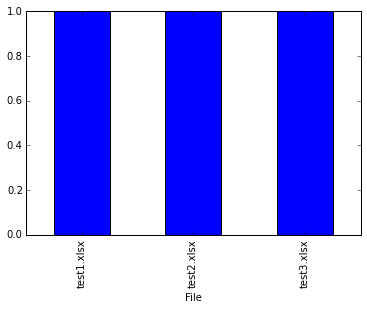

In [117]:
# Le désiner!
big_df['Channel'].plot(kind='bar');